# Libraries Description

## Data Handling & Visualization

### import numpy as np  
Used for numerical operations, arrays, and matrices.

### import pandas as pd  
Handles structured data like tables, CSV files, and DataFrames.

### import matplotlib.pyplot as plt  
Creates basic plots like line, bar, and scatter charts.

### import seaborn as sns  
Built on Matplotlib, used for attractive statistical plots like heatmaps and boxplots.

---

## Machine Learning

### from sklearn.linear_model import LinearRegression  
Implements Linear Regression for predicting continuous values.

### from sklearn.ensemble import RandomForestRegressor  
Ensemble model using multiple decision trees for improved accuracy.

---

## Model Training & Evaluation

### from sklearn.model_selection import train_test_split  
Splits data into training and testing sets.

### from sklearn.metrics import mean_squared_error, r2_score  
MSE: Measures average squared errors.  
R²: Measures how well the model explains variance.

---

## Data Cleaning

### from sklearn.impute import SimpleImputer  
Fills missing values using strategies like mean or median.

---

## Model Saving

### import pickle  
Saves and loads trained models to/from disk for reuse.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import pickle

# Data Class Description

## Attributes

### file_path  
Stores the path to the CSV file (string).

### data  
Holds the loaded dataset as a Pandas DataFrame.

---

## Constructor: __init__(self, file_path)

### Purpose  
Initializes the object with the file path and sets `data` to None.

### Parameter  
- `file_path`: Path to the CSV file.

---

## Method: load_csv(self)

### Purpose  
Loads the CSV file into a DataFrame with error handling.

### Behavior  
- Uses `pd.read_csv()` to load data from `file_path`.  
- On success: stores data in `self.data` and prints a success message.  
- On failure: prints error message for `FileNotFoundError` or general exceptions.

### Returns  
- The DataFrame (`self.data`) or `None` if loading fails.


In [2]:
# Class: Data
# Handle: This class handles loading data from a CSV file using pandas.
# Purpose: To encapsulate CSV loading functionality with error handling.
# Attributes:
#   - file_path: stores the path to the CSV file provided by the user.
#   - data: stores the DataFrame after loading the CSV.

class Data:
    def __init__(self, file_path):
        """
        Constructor Method
        ------------------
        Requirements:
            - file_path (str): Path to the CSV file to be loaded.
        Description:
            Initializes the Data class with the provided file path.
        Purpose:
            To store the path to the CSV file for later use in loading.
        """
        self.file_path = file_path  # Store CSV file path for loading
        self.data = None            # Initialize data attribute to None

    def load_csv(self):
        """
        Method: load_csv
        ----------------
        Requirements:
            - The file_path must be a valid path to a CSV file.
            - pandas must be imported.
        Description:
            Loads data from the given CSV file using pandas.
            Implements error handling for file not found or other issues.
        Purpose:
            To safely read and return a pandas DataFrame from the CSV file.
        Returns:
            - self.data (DataFrame): Loaded data if successful; None if failed.
        """
        try:
            # Try to read the CSV file
            self.data = pd.read_csv(self.file_path)
            print("CSV file loaded successfully!")  # Notify success

        except FileNotFoundError:
            # Specific error if the file does not exist
            print("Error: The file was not found")

        except Exception as e:
            # Generic error handling
            print(f"Error while loading file: {e}")

        return self.data  # Return the loaded DataFrame (or None if failed)

# Class: DataProcessor

## Purpose  
Provides tools to explore, analyze, and preprocess a dataset using Pandas methods.

---

## Attribute  
### data  
Stores the DataFrame loaded from a CSV file.

---

## Constructor: __init__(self, file_path)  
- Loads data from the given CSV path using `pd.read_csv()  
- Stores it in `self.data

---

## Exploration Methods  
- Head(n): First n rows.  
- Tail(n): Last n rows.  
- Sample(n): Random n rows.  
- HeadLoad(data, n, mode): Chooses between head, tail, or sample.  
- Shape(): Returns (rows, columns).  
- column_count(): Total number of columns.  
- Info(): Data types and memory info.  
- Describe(): Stats for numeric columns.  
- DescribeLoad(data, mode): Chooses shape, info, or describe.

---

## Data Access  
- Loc(start, end): Row access using labels/index names.  
- Iloc(start, end): Row access by position.  
- LocLoad(data, mode, start, end): Switches between loc and iloc.

---

## Statistical Methods  
- Mean(): Mean of numeric columns.  
- Median(): Median of numeric columns.  
- Mode(): Mode of all columns.  
- Mean_Median_Mode(data, mode): Selects one dynamically.

---

## Missing Data  
- is_null(): Count of null values in each column.

---

## Grouping  
- group_by(column_name): Groups data by a column and returns mean of numeric values.


In [3]:
# Class: DataProcessor
# Handle: Provides easy access to data inspection and analysis methods.
# Purpose: To process and explore a dataset through various built-in functions.
# Attributes:
#   - data: Stores the loaded DataFrame from a CSV file.

class DataProcessor:

    def __init__(self, file_path):
        """
        Constructor Method
        ------------------
        Requirements:
            - file_path (str): Path to a valid CSV file.
        Description:
            Loads the CSV file into a pandas DataFrame.
        Purpose:
            To initialize the class and store the dataset for processing.
        """
        self.data = pd.read_csv(file_path)

    def Head(self, number):
        """
        Method: Head
        -------------
        Requirements:
            - number (int): Number of rows to return.
        Description:
            Returns the first 'number' of rows from the dataset.
        Purpose:
            To get a quick look at the top of the dataset.
        """
        return self.data.head(number)

    def Tail(self, number):
        """
        Method: Tail
        -------------
        Requirements:
            - number (int): Number of rows to return.
        Description:
            Returns the last 'number' of rows from the dataset.
        Purpose:
            To inspect the ending portion of the dataset.
        """
        return self.data.tail(number)

    def Sample(self, number):
        """
        Method: Sample
        ---------------
        Requirements:
            - number (int): Number of random rows to return.
        Description:
            Randomly samples 'number' of rows from the dataset.
        Purpose:
            To get a random look at the dataset.
        """
        return self.data.sample(number)

    def HeadLoad(self, data, number, mode):
        """
        Method: HeadLoad
        -----------------
        Requirements:
            - data (DataFrame): Dataset to operate on.
            - number (int): Number of rows to return.
            - mode (str): 'head', 'tail', or anything else for sample.
        Description:
            Dynamically selects head, tail, or sample based on mode.
        Purpose:
            To quickly access dataset parts based on user preference.
        """
        modeFilter = (mode.lower()).strip()
        if modeFilter == 'head':
            return data.head(number)
        elif modeFilter == 'tail':
            return data.tail(number)
        else:
            return data.sample(number)

    def column_count(self):
        """
        Method: column_count
        ---------------------
        Requirements: None
        Description:
            Returns the total number of columns in the dataset.
        Purpose:
            To understand how many features are present.
        """
        return self.data.shape[1]

    def Shape(self):
        """
        Method: Shape
        --------------
        Requirements: None
        Description:
            Returns the shape of the dataset as (rows, columns).
        Purpose:
            To get overall dataset dimensions.
        """
        return self.data.shape

    def Info(self):
        """
        Method: Info
        -------------
        Requirements: None
        Description:
            Displays information about columns, data types, and non-null counts.
        Purpose:
            To understand structure and quality of dataset.
        """
        return self.data.info()

    def Describe(self):
        """
        Method: Describe
        -----------------
        Requirements: None
        Description:
            Generates descriptive statistics for numeric columns.
        Purpose:
            To understand data distribution and summary stats.
        """
        return self.data.describe()

    def DescribeLoad(self, data, mode):
        """
        Method: DescribeLoad
        ---------------------
        Requirements:
            - data (DataFrame): Dataset to inspect.
            - mode (str): 'shape', 'info', or anything else for describe.
        Description:
            Dynamically returns shape, info, or describe based on mode.
        Purpose:
            To flexibly explore dataset summary.
        """
        modeFilter = (mode.lower()).strip()
        if modeFilter == 'shape':
            return data.shape
        elif modeFilter == 'info':
            return data.info()
        else:
            return data.describe()

    def Loc(self, start, end):
        """
        Method: Loc
        ------------
        Requirements:
            - start, end: Index labels to retrieve.
        Description:
            Returns rows between two index labels using .loc.
        Purpose:
            To fetch data via label-based slicing.
        """
        return self.data.loc[start:end]

    def Iloc(self, start, end):
        """
        Method: Iloc
        -------------
        Requirements:
            - start, end: Index positions (integers).
        Description:
            Returns rows between two positions using .iloc.
        Purpose:
            To fetch data via index-based slicing.
        """
        return self.data.iloc[start:end]

    def LocLoad(self, data, mode, start, end):
        """
        Method: LocLoad
        ----------------
        Requirements:
            - data (DataFrame): Dataset to slice.
            - mode (str): Either 'loc' or 'iloc'.
            - start, end: Index or label range.
        Description:
            Dynamically selects between .loc and .iloc for row retrieval.
        Purpose:
            To offer flexible row selection based on mode.
        """
        modeFilter = (mode.lower()).strip()
        if modeFilter == 'loc':
            return data.loc[start:end]
        else:
            return data.iloc[start:end]

    def Mean(self):
        """
        Method: Mean
        -------------
        Requirements: None
        Description:
            Computes mean of all numeric columns.
        Purpose:
            To find average values across features.
        """
        return self.data.mean(numeric_only=True)

    def Median(self):
        """
        Method: Median
        ---------------
        Requirements: None
        Description:
            Computes median of all numeric columns.
        Purpose:
            To find middle value ignoring extreme outliers.
        """
        return self.data.median(numeric_only=True)

    def Mode(self):
        """
        Method: Mode
        -------------
        Requirements: None
        Description:
            Returns the mode (most frequent value) of each column.
        Purpose:
            To identify common values in the dataset.
        """
        return self.data.mode()

    def Mean_Median_Mode(self, data, mode):
        """
        Method: Mean_Median_Mode
        -------------------------
        Requirements:
            - data (DataFrame): Dataset to analyze.
            - mode (str): Either 'mean', 'median', or any other string for mode.
        Description:
            Dynamically computes and returns one of mean, median, or mode.
        Purpose:
            To flexibly get desired central tendency.
        """
        modeFilter = (mode.lower()).strip()
        if modeFilter == 'mean':
            return data.mean(numeric_only=True)
        elif modeFilter == 'median':
            return data.median(numeric_only=True)
        else:
            return data.mode()

    def is_null(self):
        """
        Method: is_null
        ----------------
        Requirements: None
        Description:
            Counts missing (null) values for each column.
        Purpose:
            To identify and handle missing data.
        """
        return self.data.isnull().sum()

    def group_by(self, column_name):
        """
        Method: group_by
        -----------------
        Requirements:
            - column_name (str): Column name to group by.
        Description:
            Groups data by a specific column and calculates mean for numeric values.
        Purpose:
            To analyze trends by category (e.g., location-wise averages).
        """
        return self.data.groupby(column_name).mean(numeric_only=True)

# Class: Graph

## Purpose  
Handles data visualization for exploratory analysis using plots to reveal trends, outliers, and relationships.

---

## Attribute  
### data  
Stores the DataFrame used in all plot methods.

---

## Constructor: __init__(self, data)  
- Receives a cleaned DataFrame.  
- Stores it in `self.data` for plotting.

---

## Plotting Methods  

- **bar_plot(width, height, title, x, y, hue=None)**  
  Bar plot to compare averages by category (e.g., avg price by area).

- **count_plot(width, height, title, column)**  
  Displays count of each category (e.g., houses per location).

- **hist_plot(width, height, title, column)**  
  Shows distribution of a numeric column with KDE (e.g., price).

- **box_plot(width, height, title, x, y)**  
  Visualizes outliers and spread using box plots.

- **scatter_plot(width, height, title, x, y)**  
  Plots relationships between two numeric variables (e.g., sqft vs price).

- **heatmap(width, height, title)**  
  Shows correlation matrix of numeric features for feature selection.


In [4]:
class Graph:
    """
    Class: Graph
    -------------
    Requirements:
        - A pandas DataFrame with cleaned and structured data.
        - matplotlib and seaborn for plotting.

    Description:
        A visualization utility class that handles all major plots needed for
        exploratory data analysis (EDA), such as bar plots, box plots, histograms,
        scatter plots, and heatmaps.

    Purpose:
        To encapsulate reusable, customizable plotting logic for data analysis
        and visualization workflows.
    """

    def __init__(self, data):
        """
        Constructor Method
        ------------------
        Requirements:
            - data (DataFrame): A cleaned pandas DataFrame ready for visualization.

        Description:
            Initializes the Graph class with a dataset.

        Purpose:
            To store the dataset and make it accessible to all plotting methods.
        """
        self.data = data

    def bar_plot(self, width, height, title, x, y, hue=None):
        """
        Method: bar_plot
        -----------------
        Requirements:
            - x (str): Categorical variable for the X-axis.
            - y (str): Numeric variable for the Y-axis.
            - hue (str, optional): Optional category for color grouping.

        Description:
            Creates a bar plot representing the average Y for each X category.

        Purpose:
            To compare mean values across categories and spot trends or differences.
        """
        plt.figure(figsize=(width, height))
        sns.barplot(x=x, y=y, hue=hue, data=self.data)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def count_plot(self, width, height, title, column):
        """
        Method: count_plot
        -------------------
        Requirements:
            - column (str): Categorical column to count frequency.

        Description:
            Plots the frequency of each category using a count plot.

        Purpose:
            To understand the distribution and popularity of each category.
        """
        plt.figure(figsize=(width, height))
        sns.countplot(x=column, data=self.data)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def hist_plot(self, width, height, title, column):
        """
        Method: hist_plot
        ------------------
        Requirements:
            - column (str): Numeric column to plot.

        Description:
            Shows the distribution of a numeric variable with an optional KDE curve.

        Purpose:
            To visualize the data spread and detect skewness or peaks.
        """
        plt.figure(figsize=(width, height))
        sns.histplot(self.data[column], kde=True)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def box_plot(self, width, height, title, x, y):
        """
        Method: box_plot
        -----------------
        Requirements:
            - x (str): Categorical column for grouping.
            - y (str): Numeric column to visualize.

        Description:
            Plots a box plot showing the median, IQR, and outliers for each group.

        Purpose:
            To detect data spread and outliers within categories.
        """
        plt.figure(figsize=(width, height))
        sns.boxplot(x=x, y=y, data=self.data)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def scatter_plot(self, width, height, title, x, y):
        """
        Method: scatter_plot
        ---------------------
        Requirements:
            - x (str): Numeric column for X-axis.
            - y (str): Numeric column for Y-axis.

        Description:
            Draws a scatter plot to examine the relationship between two numeric variables.

        Purpose:
            To detect trends, clusters, and potential correlations.
        """
        plt.figure(figsize=(width, height))
        sns.scatterplot(x=x, y=y, data=self.data)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def heatmap(self, width, height, title):
        """
        Method: heatmap
        ----------------
        Requirements:
            - Dataset must include at least two numeric columns.

        Description:
            Plots a correlation matrix heatmap using Pearson coefficients.

        Purpose:
            To visually assess the strength of linear relationships among numeric features.
        """
        plt.figure(figsize=(width, height))
        sns.heatmap(self.data.corr(numeric_only=True), annot=True, cmap='coolwarm')
        plt.title(title)
        plt.tight_layout()
        plt.show()


# Class: BivariateAnalysis

## Purpose  
Analyzes relationships between two variables using plots—helpful in spotting trends affecting house prices.

---

## Attributes  
- **data**: The dataset to analyze.  
- **graph**: Instance of the `Graph` class for visualization.

---

## Constructor: __init__(self, data)  
Initializes with the dataset and creates a `Graph` object for plotting.

---

## Analysis Methods  

- **price_vs_area_type()**  
  Box plot: Price across different area types.

- **price_vs_location()**  
  Bar chart: Avg prices for top 10 frequent locations.

- **sqft_vs_price()**  
  Scatter plot: Price vs. square footage.

- **bhk_vs_price()**  
  Box plot: Price distributions for BHK counts (checks BHK column).

- **show_correlation()**  
  Heatmap: Correlation among numeric features.

In [5]:
class BivariateAnalysis:
    """
    Class: BivariateAnalysis
    -------------------------
    Requirements:
        - A pandas DataFrame containing both numeric and categorical columns.
        - A functioning Graph class for plotting.

    Description:
        This class performs bivariate exploratory data analysis,
        focusing on the relationship between two variables using visual techniques
        such as box plots, scatter plots, and heatmaps.

    Purpose:
        To uncover patterns, trends, and correlations between feature pairs
        that can help in feature selection and hypothesis validation before modeling.
    """

    def __init__(self, data):
        """
        Constructor Method
        ------------------
        Requirements:
            - data (DataFrame): The dataset to analyze.

        Description:
            Initializes the BivariateAnalysis instance with the given data
            and sets up a Graph object to handle all visualizations.

        Purpose:
            To prepare for bivariate EDA by establishing a reusable plotting engine.
        """
        self.data = data
        self.graph = Graph(data)

    def price_vs_area_type(self, width, height, title, x, y):
        """
        Method: price_vs_area_type
        ---------------------------
        Requirements:
            - x (str): Categorical column name (e.g., 'area_type').
            - y (str): Numeric column name (e.g., 'price').

        Description:
            Generates a box plot to show how price varies across different area types.

        Purpose:
            To identify any impact that 'area_type' might have on property pricing.
        """
        print("Box Plot: Price vs Area Type")
        self.graph.box_plot(width, height, title, x, y)

    def price_vs_location(self, width, height, title, x, y):
        """
        Method: price_vs_location
        --------------------------
        Requirements:
            - x (str): Categorical column (e.g., 'location').
            - y (str): Numeric column (e.g., 'price').

        Description:
            Filters top 10 most common locations and creates a bar plot
            to show average prices per location.

        Purpose:
            To compare average prices between the most frequent locations
            and highlight geographic influence on property value.
        """
        print("Bar Plot: Avg Price by Location")
        top_locations = self.data['location'].value_counts().head(10).index
        filtered_data = self.data[self.data['location'].isin(top_locations)]
        graph_local = Graph(filtered_data)
        graph_local.bar_plot(width, height, title, x, y)

    def sqft_vs_price(self, width, height, title, x, y):
        """
        Method: sqft_vs_price
        ----------------------
        Requirements:
            - x (str): Numeric feature for X-axis (e.g., 'total_sqft').
            - y (str): Numeric target (e.g., 'price').

        Description:
            Creates a scatter plot of price versus house size in square feet.

        Purpose:
            To identify correlation, outliers, or clusters between property size and price.
        """
        print("Scatter Plot: Price vs Total Sqft")
        self.graph.scatter_plot(width, height, title, x, y)

    def bhk_vs_price(self, width, height, title, x, y):
        """
        Method: bhk_vs_price
        ---------------------
        Requirements:
            - x (str): Categorical column (e.g., 'bhk').
            - y (str): Numeric column (e.g., 'price').

        Description:
            Plots a box plot comparing property prices across different BHK values.

        Purpose:
            To visualize the effect of the number of bedrooms on house pricing.
        """
        print("Box Plot: Price vs BHK")
        if 'bhk' in self.data.columns:
            self.graph.box_plot(width, height, title, x, y)
        else:
            print("Column 'bhk' not found!")

    def show_correlation(self, width, height, title):
        """
        Method: show_correlation
        -------------------------
        Requirements:
            - The dataset must contain at least two numeric columns.

        Description:
            Generates a heatmap showing pairwise correlation coefficients
            between numeric variables.

        Purpose:
            To detect multicollinearity, strong predictors, and
            important feature relationships before modeling.
        """
        print("Heatmap: Numeric Correlation")
        self.graph.heatmap(width, height, title)


# Class: UnivariateAnalysis

## Purpose  
Performs EDA on single columns to understand distribution, frequency, and stats of categorical/numeric features.

---

## Attributes  
- **data**: Dataset to analyze.  
- **graph**: Instance of `Graph` class for plotting.

---

## Constructor: __init__(self, data)  
Loads dataset and initializes the Graph object.

---

## Analysis Methods  

- **show_price_distribution()**  
  Histogram + KDE for price distribution.

- **show_area_type_distribution()**  
  Count plot for different area types.

- **show_bhk_distribution()**  
  Count plot for BHK counts (checks column first).

- **show_availability_distribution()**  
  Count plot for availability status.

- **show_numeric_descriptions()**  
  Displays summary stats (mean, std, min, etc.) for numeric columns.

In [6]:
class UnivariateAnalysis:
    """
    Class: UnivariateAnalysis
    --------------------------
    Requirements:
        - A pandas DataFrame with both numerical and categorical columns.
        - A working Graph class instance for plotting.

    Description:
        Performs univariate exploratory data analysis on a given dataset.
        It visualizes single-feature distributions using histograms or count plots
        and prints numeric summaries for all numeric columns.

    Purpose:
        To understand the individual distribution, spread, and frequencies
        of features (both numeric and categorical) before moving to multivariate analysis.
    """

    def __init__(self, data):
        """
        Constructor Method
        -------------------
        Requirements:
            - data (DataFrame): The dataset for univariate analysis.

        Description:
            Initializes the UnivariateAnalysis instance with dataset
            and sets up the Graph object to handle visualizations.

        Purpose:
            To prepare for EDA by attaching plotting functionality
            to the provided dataset.
        """
        self.data = data
        self.graph = Graph(data)  # Reuse the Graph class for visualization

    def show_price_distribution(self, width, height, title, column):
        """
        Method: show_price_distribution
        --------------------------------
        Requirements:
            - column (str): A numeric column (commonly 'price') to analyze.

        Description:
            Displays the distribution of a numeric variable using
            a histogram with optional KDE overlay.

        Purpose:
            To analyze how the target price variable is distributed
            and detect skewness or outliers visually.
        """
        print("Histogram: Price Distribution")
        self.graph.hist_plot(width, height, title, column)

    def show_area_type_distribution(self, width, height, title, column):
        """
        Method: show_area_type_distribution
        ------------------------------------
        Requirements:
            - column (str): A categorical column (commonly 'area_type').

        Description:
            Uses a count plot to visualize how many records fall
            under each unique category.

        Purpose:
            To examine the frequency of each area type
            and detect class imbalance if present.
        """
        print("Count Plot: Area Type")
        self.graph.count_plot(width, height, title, column)

    def show_bhk_distribution(self, width, height, title, column):
        """
        Method: show_bhk_distribution
        ------------------------------
        Requirements:
            - column (str): Categorical column representing BHK count.

        Description:
            Plots the frequency of properties by their BHK (bedroom) value.

        Purpose:
            To understand the popularity or availability of different
            BHK configurations in the dataset.
        """
        if column in self.data.columns:
            print("Count Plot: BHK Distribution")
            self.graph.count_plot(width, height, title, column)
        else:
            print(f"Column '{column}' not found!")

    def show_availability_distribution(self, width, height, title, column):
        """
        Method: show_availability_distribution
        ---------------------------------------
        Requirements:
            - column (str): Categorical column (e.g., 'availability').

        Description:
            Generates a count plot to display how many properties are available
            under each availability category (e.g., ready to move, under construction).

        Purpose:
            To explore the distribution of availability statuses among properties.
        """
        if column in self.data.columns:
            print("Count Plot: Availability")
            self.graph.count_plot(width, height, title, column)
        else:
            print(f"Column '{column}' not found!")

    def show_numeric_descriptions(self):
        """
        Method: show_numeric_descriptions
        ----------------------------------
        Requirements:
            - Dataset should include at least one numeric column.

        Description:
            Outputs statistical summaries including mean, standard deviation,
            min/max values, and quartiles for all numeric columns.

        Purpose:
            To get a quantitative overview of the dataset and
            spot anomalies or skewed data.
        """
        print("Numeric Description:")
        print(self.data.describe())


# Class: PricePredictionModel

## Purpose  
Handles preprocessing, training, and evaluation of models for house price prediction.

---

## Attributes  
- **data**: Original dataset (copied to avoid mutation).  
- **model**: Trained ML model (Linear or Random Forest).  
- **X_train, X_test, y_train, y_test**: Train/test data splits.

---

## Constructor: __init__(self, data)  
Initializes dataset and model variables.

---

## Method: prepare_data(features, target='price')  
- Cleans total_sqft (handles ranges & units).  
- Drops rows with null sqft/price.  
- Splits into train/test sets (80/20).

---

## Method: train(model_type='linear')  
Trains the model:  
- 'linear' for LinearRegression  
- 'random_forest' for RandomForestRegressor

---

## Method: evaluate()  
- Calculates **MSE** (Mean Squared Error)  
- Calculates **R² Score** (model fit)

**Returns:** `(mse, r2)

In [7]:
# Class: PricePredictionModel
# Purpose: Preprocesses data, trains model (Linear or Random Forest), and evaluates performance.

class PricePredictionModel:
    """
    Class: PricePredictionModel
    ----------------------------
    Requirements:
        - Requires a pandas DataFrame containing features and target column.
        - Assumes 'total_sqft' column may need cleaning.
        - sklearn and numpy must be installed.
    
    Description:
        This class handles the core machine learning workflow:
        - Data preparation & cleaning
        - Model training (Linear Regression or Random Forest)
        - Model evaluation using MSE and R² metrics
    
    Purpose:
        To automate the process of predicting housing prices by training 
        and evaluating ML models on cleaned and split datasets.
    """

    def __init__(self, data):
        """
        Constructor Method
        -------------------
        Requirements:
            - data (DataFrame): The raw dataset.
        Description:
            Initializes the model and sets up placeholders for train/test splits.
        Purpose:
            To prepare for later data transformation, training, and evaluation.
        """
        self.data = data.copy()
        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self, features, target='price'):
        """
        Method: prepare_data
        ---------------------
        Requirements:
            - features (list): List of feature column names.
            - target (str): Name of the target column. Default is 'price'.
        Description:
            Cleans the 'total_sqft' column (e.g., handles ranges or 'Sq. Yards'),
            drops missing values, and splits the dataset into training and test sets.
        Purpose:
            To transform messy raw data into a clean, model-ready format.
        """

        def convert_sqft(x):
            try:
                return float(x)
            except:
                if isinstance(x, str):
                    if '-' in x:
                        tokens = x.split('-')
                        nums = []
                        for t in tokens:
                            try:
                                nums.append(float(t.strip()))
                            except:
                                return np.nan
                        return np.mean(nums)
                    elif 'Sq. Yards' in x:
                        num_part = x.split('Sq. Yards')[0].strip()
                        try:
                            return float(num_part) * 9
                        except:
                            return np.nan
                    else:
                        return np.nan
                else:
                    return np.nan

        self.data['total_sqft'] = self.data['total_sqft'].apply(convert_sqft)
        self.data = self.data.dropna(subset=['total_sqft', target])

        X = self.data[features]
        y = self.data[target]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)
        
        print("Data prepared: train and test sets created.")

    def train(self, model_type='linear'):
        if model_type == 'linear':
            self.model = LinearRegression()
        elif model_type == 'random_forest':
            self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        elif model_type == 'svr':
            self.model = SVR(kernel='rbf')
        else:
            raise ValueError("model_type must be 'linear', 'random_forest' or 'svr'")

        self.model.fit(self.X_train, self.y_train)
        print(f"{model_type} model trained successfully.")


    def evaluate(self):
        """
        Method: evaluate
        -----------------
        Requirements:
            - Trained model
        Description:
            Predicts on test data and prints evaluation metrics: Mean Squared Error and R² score.
        Purpose:
            To assess model performance on unseen data.
        """
        preds = self.model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, preds)
        r2 = r2_score(self.y_test, preds)
        print("Model Evaluation:")
        print(f"MSE: {mse:.2f}")
        print(f"R2 Score: {r2:.2f}")
        return mse, r2

# Class: Pickle

## Purpose  
Handles saving and loading machine learning models using Python’s pickle module.

---

## Method: save_model(model, filename)  
- **Inputs**:  
  - model: Trained ML model (e.g., LinearRegression)  
  - filename: Name to save the model (e.g., 'model.pkl')  
- **Action**: Saves the model as a binary .pkl file.

---

## Method: load_model(filename)  
- **Input**:  
  - filename: Name of the .pkl file to load  
- **Returns**:  
  - The loaded model ready for predictions.


In [8]:
# Class: Pickle
# Handle: Responsible for saving and loading machine learning models.
# Purpose: Ensures model persistence across sessions for reuse without retraining.
# Attribute: None (stateless utility class using only methods)

class Pickle:
    """
    Class: Pickle
    --------------
    Requirements:
        - import pickle module
    Description:
        A utility class for saving and loading machine learning models using Python’s pickle.
        This class ensures that once trained, models can be stored and reused without re-training.
    Purpose:
        To provide simple, reusable functions for persisting ML models.
    """

    def save_model(self, model, filename):
        """
        Method: save_model
        --------------------
        Requirements:
            - model: A trained machine learning model (e.g., LinearRegression, RandomForest).
            - filename (str): File name with .pkl extension where model will be saved.
        Description:
            Serializes the model and writes it to the given file path using pickle.
        Purpose:
            To persist the trained model for future use without retraining.
        """
        with open(filename, 'wb') as f:
            pickle.dump(model, f)
        print(f"Model saved to {filename}")

    def load_model(self, filename):
        """
        Method: load_model
        --------------------
        Requirements:
            - filename (str): Path to the .pkl file containing the saved model.
        Description:
            Loads a previously saved model from the specified pickle file.
        Purpose:
            To reuse an already trained model for prediction, evaluation, or deployment.
        """
        with open(filename, 'rb') as f:
            model = pickle.load(f)
        print(f"Model loaded from {filename}")
        return model

### For output

In [9]:
loader = Data("Data.csv")
data = loader.load_csv()

CSV file loaded successfully!


In [10]:
processor = DataProcessor("Data.csv")

# Head, Tail, Sample
print("Head:\n", processor.Head(5))
print("Tail:\n", processor.Tail(5))
print("Sample:\n", processor.Sample(5))

# HeadLoad
print("HeadLoad - Head:\n", processor.HeadLoad(processor.data, 3, 'head'))
print("HeadLoad - Tail:\n", processor.HeadLoad(processor.data, 3, 'tail'))
print("HeadLoad - Sample:\n", processor.HeadLoad(processor.data, 3, 'sample'))

# Column Count and Shape
print("Column Count:", processor.column_count())
print("Shape:", processor.Shape())

# Info and Describe
print("Info:")
processor.Info()
print("Describe:\n", processor.Describe())

# DescribeLoad
print("DescribeLoad - Shape:", processor.DescribeLoad(processor.data, 'shape'))
print("DescribeLoad - Info:")
processor.DescribeLoad(processor.data, 'info')
print("DescribeLoad - Describe:\n", processor.DescribeLoad(processor.data, 'describe'))

# Loc, Iloc
print("Loc 0-4:\n", processor.Loc(0, 4))
print("Iloc 0-4:\n", processor.Iloc(0, 4))
print("LocLoad - Loc:\n", processor.LocLoad(processor.data, 'loc', 0, 4))
print("LocLoad - Iloc:\n", processor.LocLoad(processor.data, 'iloc', 0, 4))

# Mean, Median, Mode
print("Mean:\n", processor.Mean())
print("Median:\n", processor.Median())
print("Mode:\n", processor.Mode())

# Mean_Median_Mode
print("MMM - Mean:\n", processor.Mean_Median_Mode(processor.data, 'mean'))
print("MMM - Median:\n", processor.Mean_Median_Mode(processor.data, 'median'))
print("MMM - Mode:\n", processor.Mean_Median_Mode(processor.data, 'mode'))

# Null check
print("Null Values:\n", processor.is_null())

# Group by (use an existing column name like 'location')
print("Group by Location (first 5):\n", processor.group_by('location').head())


Head:
               area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
Tail:
                   area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Richards Town    

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11244\3844065784.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bhk'] = df_cleaned['size'].apply(lambda x: int(str(x).split(' ')[0]) if pd.notnull(x) else None)


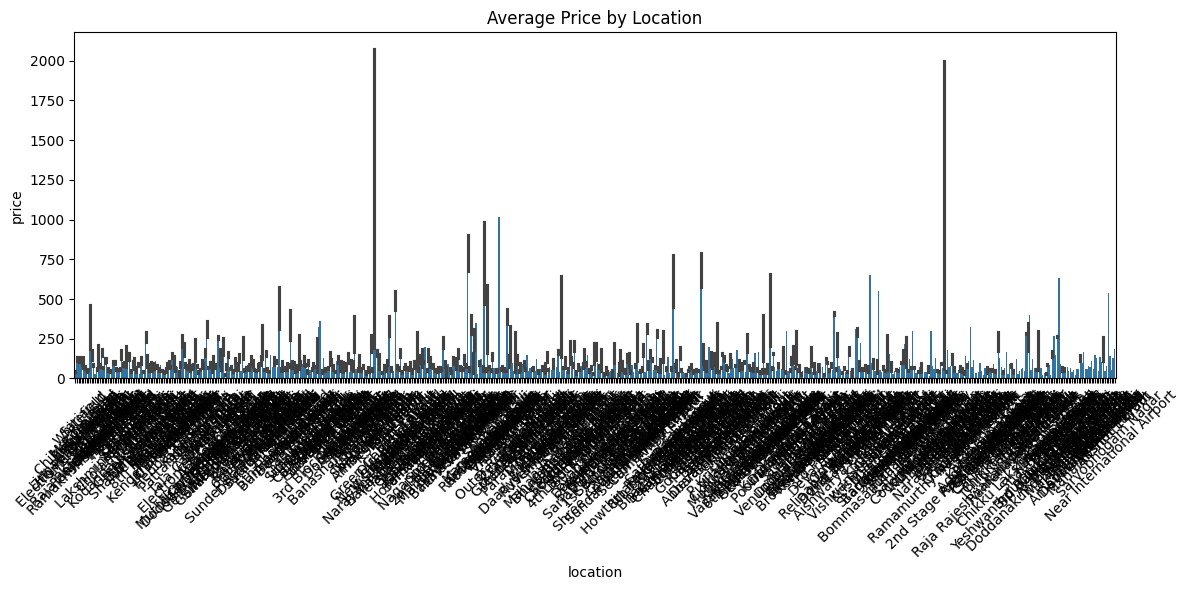

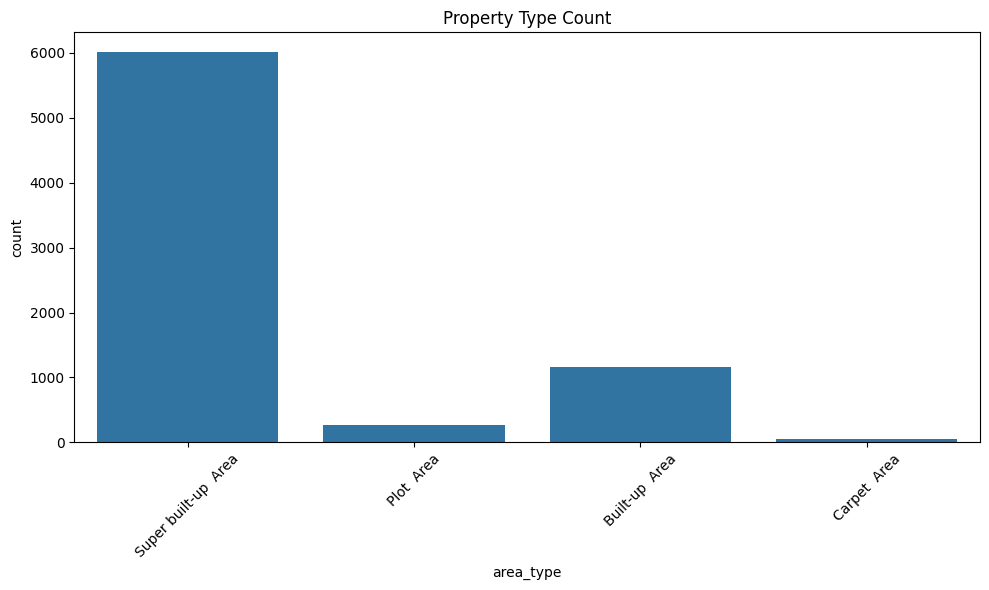

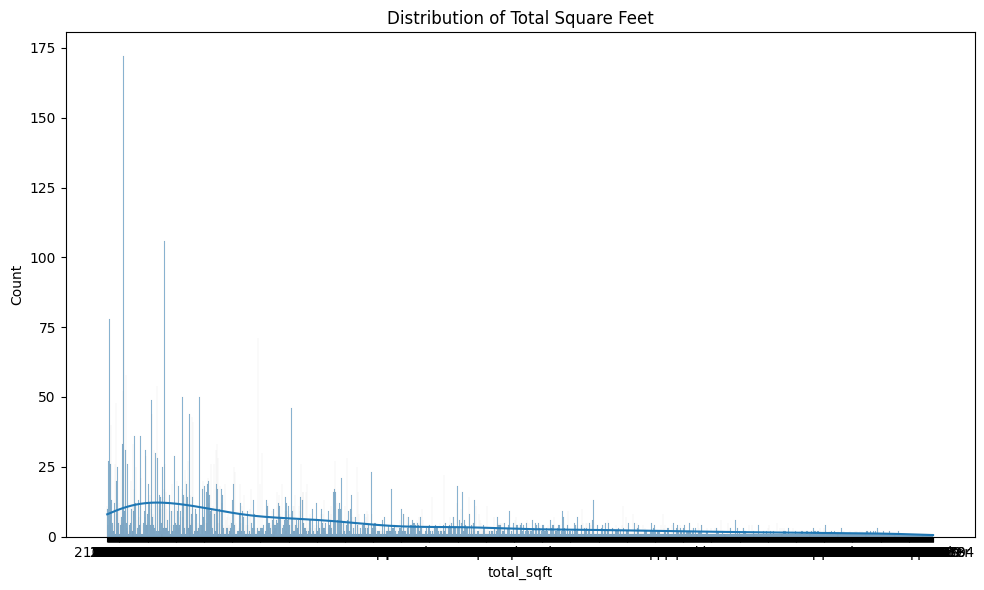

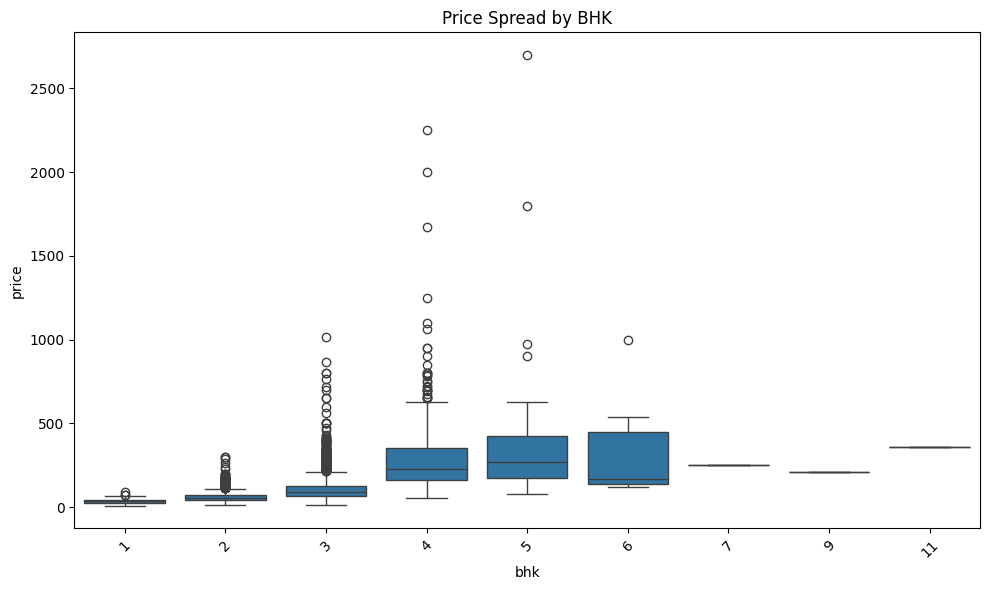

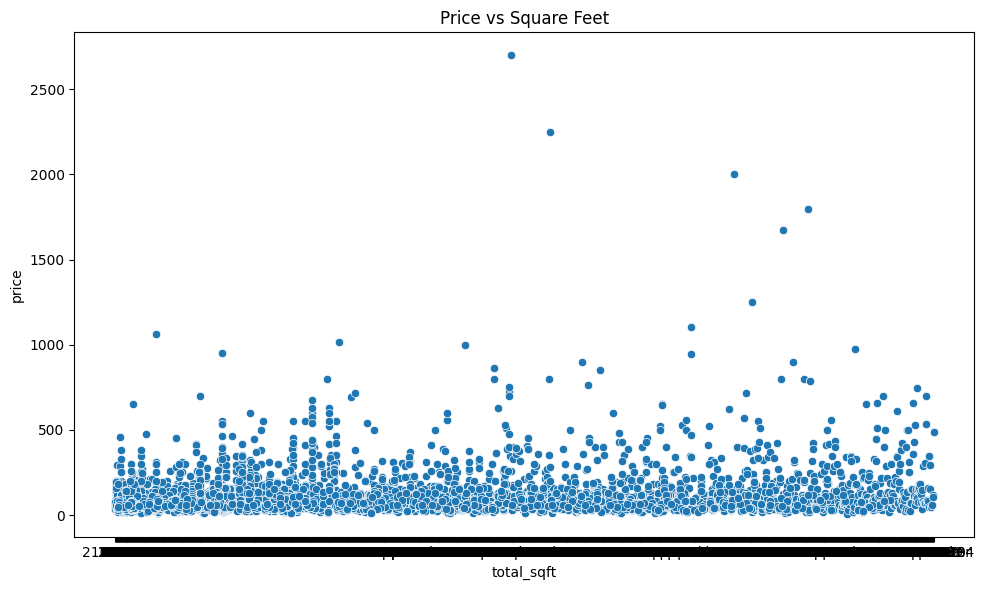

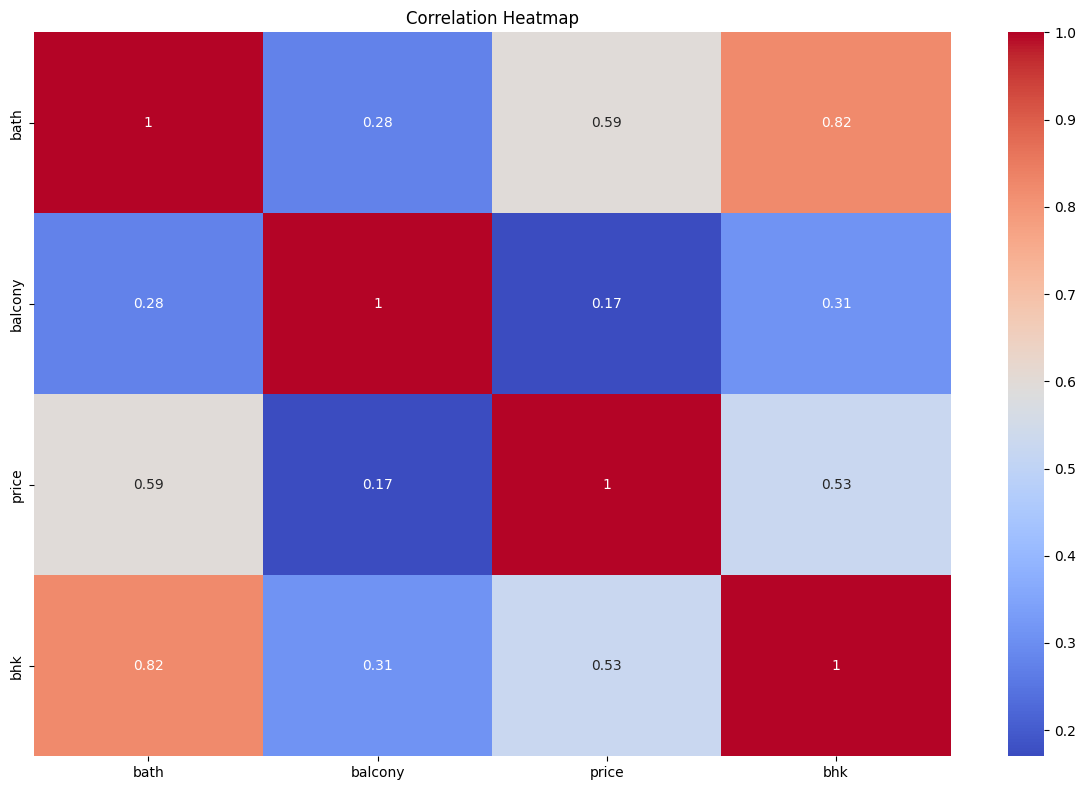

In [11]:
# Load dataset
df = pd.read_csv("Data.csv")

# Drop null values
df_cleaned = df.dropna()

# Create BHK column from 'size'
df_cleaned['bhk'] = df_cleaned['size'].apply(lambda x: int(str(x).split(' ')[0]) if pd.notnull(x) else None)

# Initialize Graph object
graph = Graph(df_cleaned)

# Bar Plot: Average Price by Location
graph.bar_plot(width=12, height=6, title="Average Price by Location", x="location", y="price", hue=None)

# Count Plot: Area Type
graph.count_plot(width=10, height=6, title="Property Type Count", column="area_type")

# Histogram: Total Square Feet Distribution
graph.hist_plot(width=10, height=6, title="Distribution of Total Square Feet", column="total_sqft")

# Box Plot: Price Spread by BHK
graph.box_plot(width=10, height=6, title="Price Spread by BHK", x="bhk", y="price")

# Scatter Plot: Price vs Total Square Feet
graph.scatter_plot(width=10, height=6, title="Price vs Square Feet", x="total_sqft", y="price")

# Heatmap: Correlation Matrix
graph.heatmap(width=12, height=8, title="Correlation Heatmap")

Box Plot: Price vs Area Type


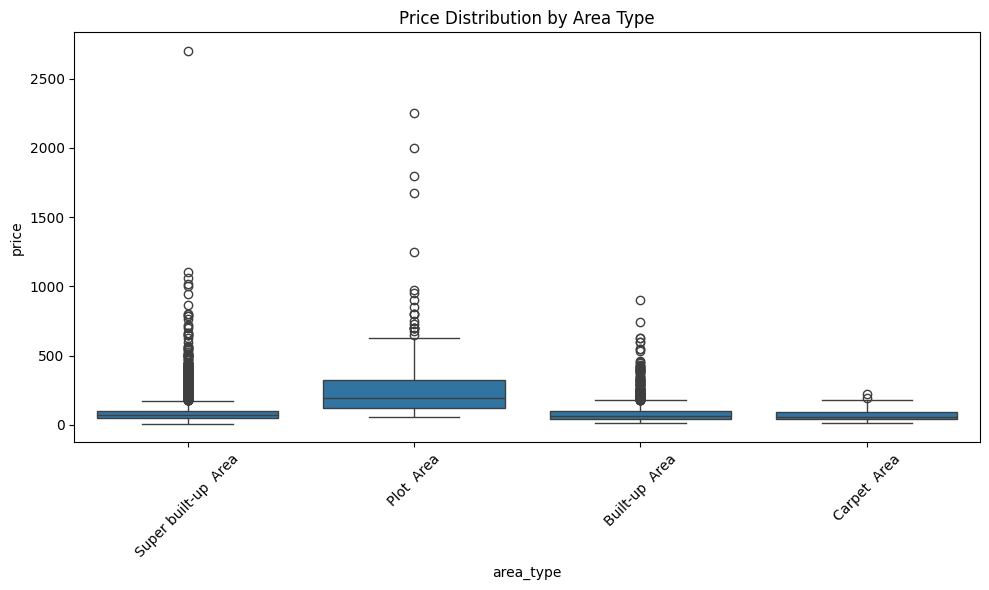

Bar Plot: Avg Price by Location


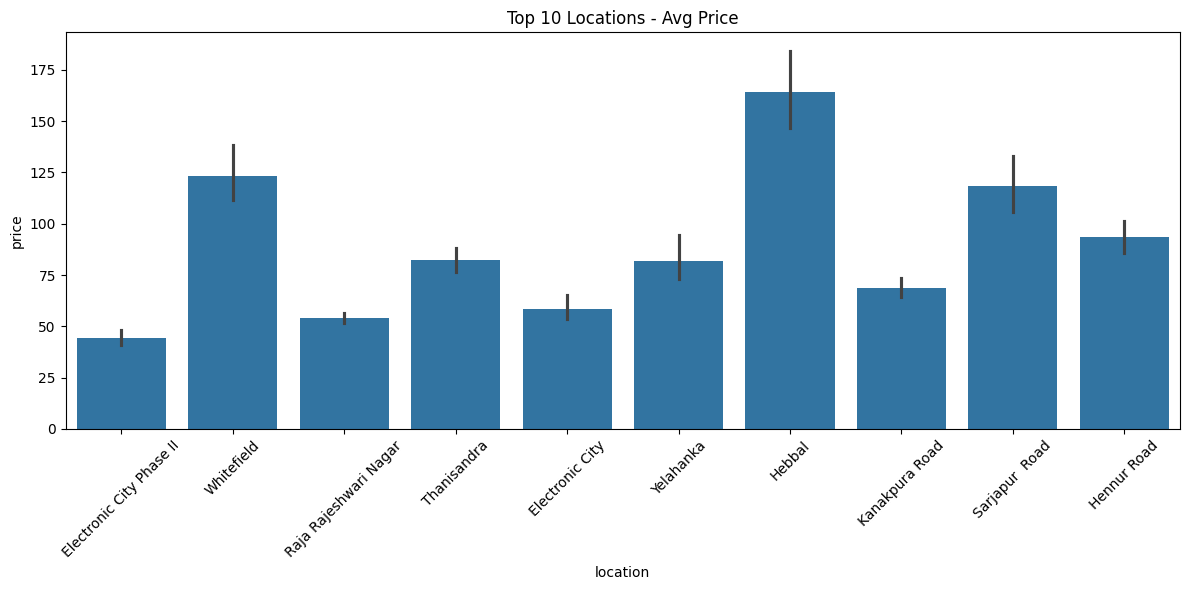

Scatter Plot: Price vs Total Sqft


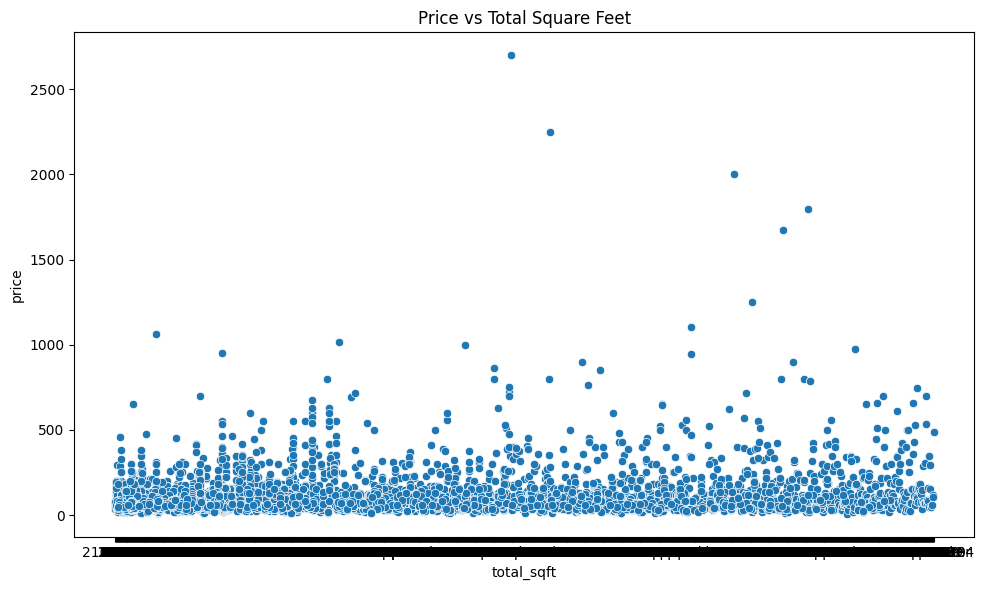

Box Plot: Price vs BHK


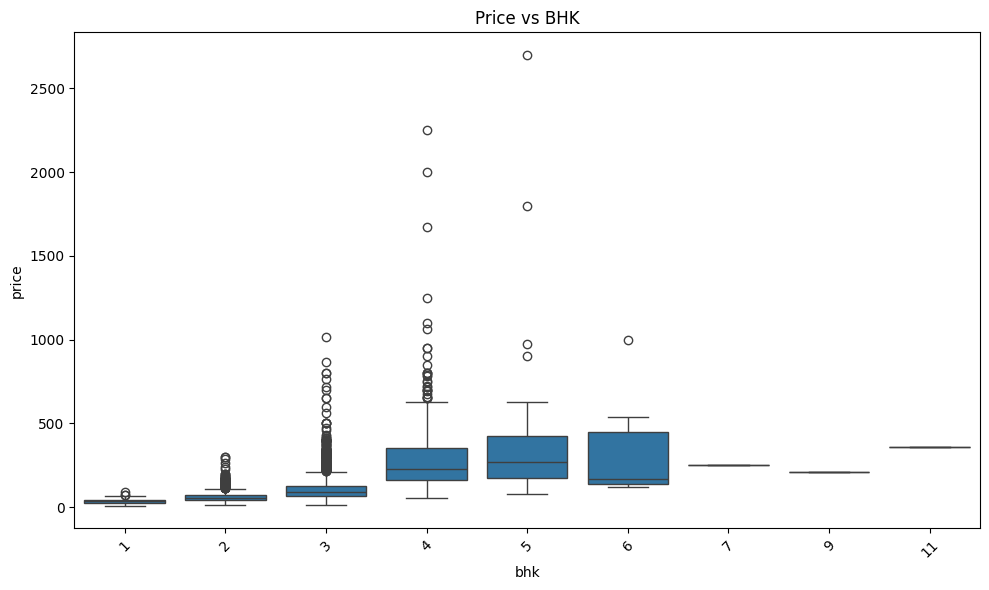

Heatmap: Numeric Correlation


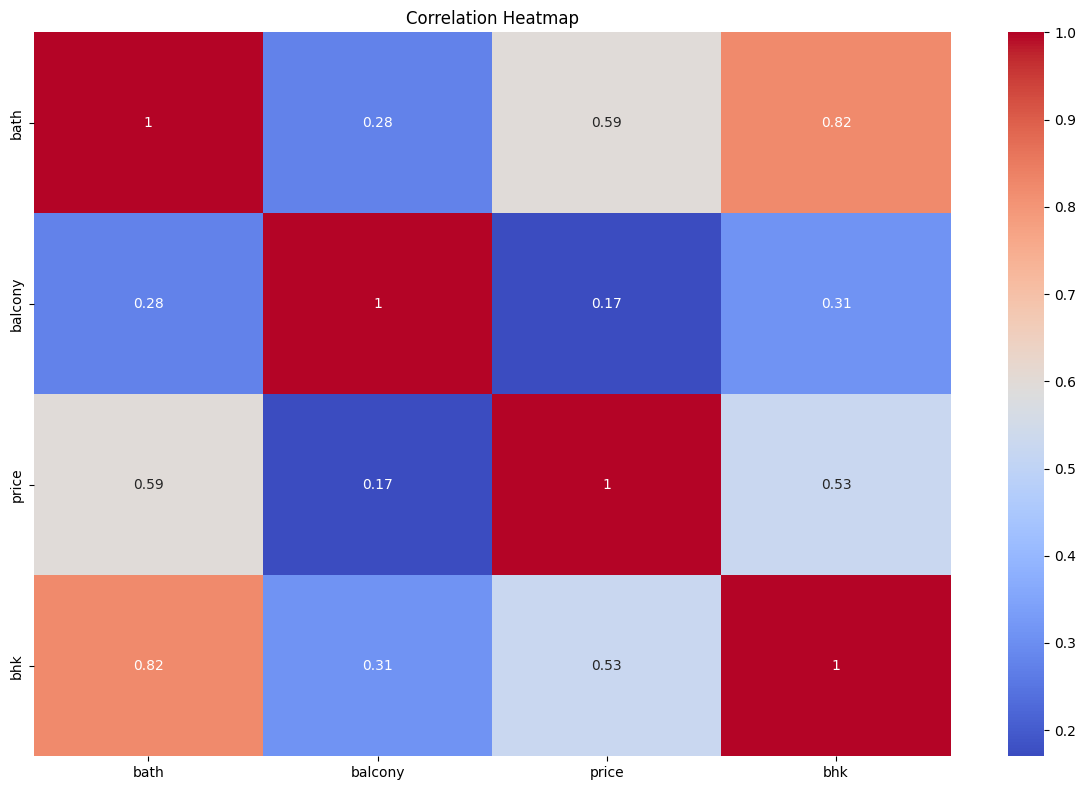

In [12]:
# Create object of BivariateAnalysis with cleaned dataset
bva = BivariateAnalysis(df_cleaned)

# Plot: Price vs Area Type
bva.price_vs_area_type(width=10, height=6, title="Price Distribution by Area Type", x="area_type", y="price")

# Plot: Price vs Top 10 Locations
bva.price_vs_location(width=12, height=6, title="Top 10 Locations - Avg Price", x="location", y="price")

# Plot: Square Feet vs Price
bva.sqft_vs_price(width=10, height=6, title="Price vs Total Square Feet", x="total_sqft", y="price")

# Plot: BHK vs Price
bva.bhk_vs_price(width=10, height=6, title="Price vs BHK", x="bhk", y="price")

# Plot: Correlation Heatmap
bva.show_correlation(width=12, height=8, title="Correlation Heatmap")

Histogram: Price Distribution


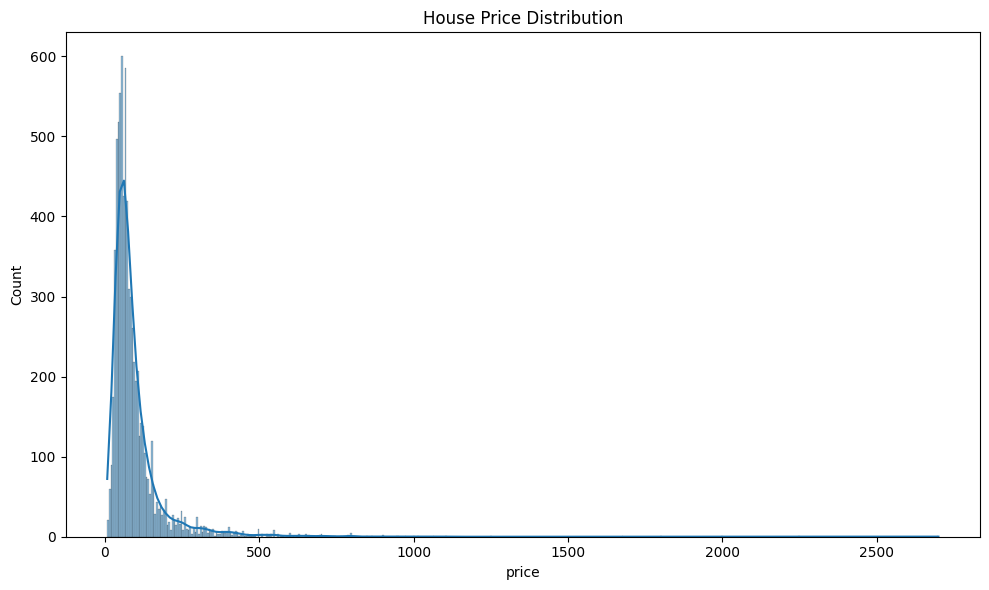

Count Plot: Area Type


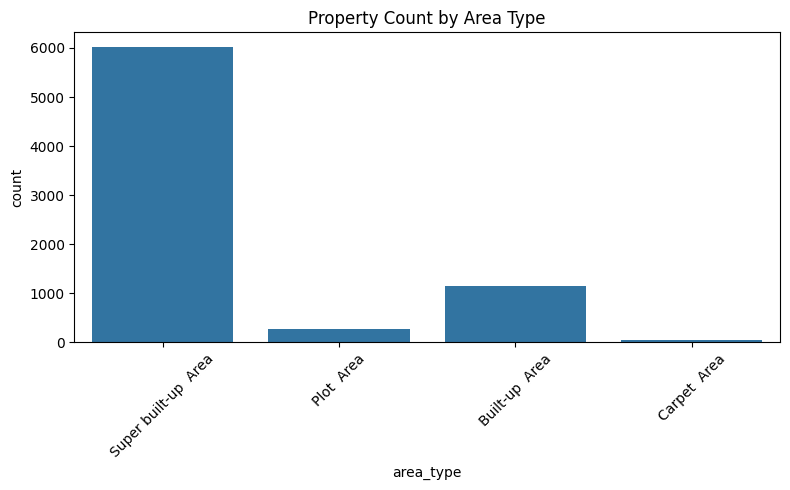

Count Plot: BHK Distribution


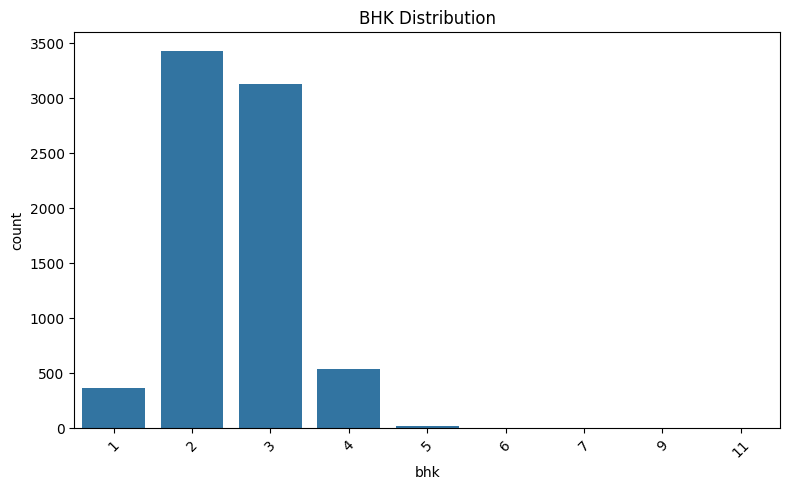

Count Plot: Availability


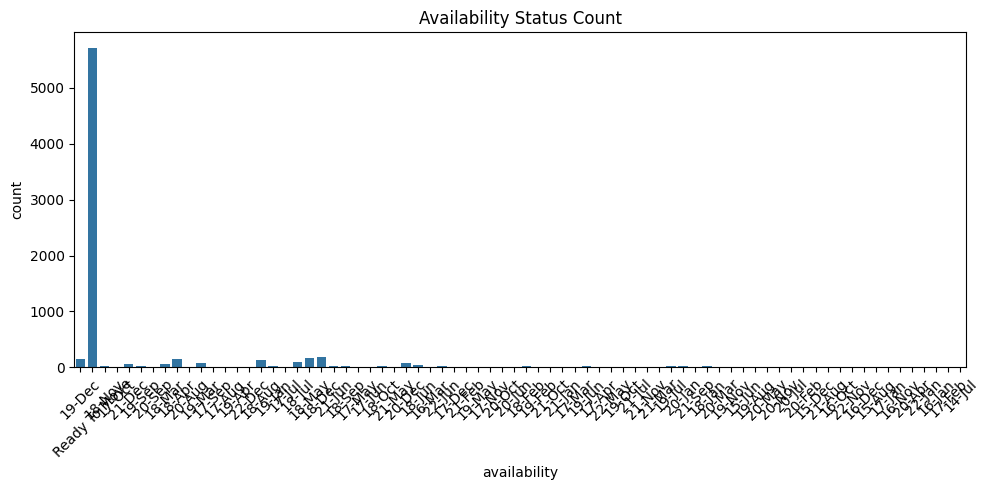

Numeric Description:
              bath      balcony        price          bhk
count  7496.000000  7496.000000  7496.000000  7496.000000
mean      2.458378     1.629936    96.857122     2.529482
std       0.881128     0.780127   105.382490     0.733228
min       1.000000     0.000000     8.000000     1.000000
25%       2.000000     1.000000    49.500000     2.000000
50%       2.000000     2.000000    69.755000     2.000000
75%       3.000000     2.000000   105.000000     3.000000
max       9.000000     3.000000  2700.000000    11.000000


In [13]:
# Create UnivariateAnalysis object
ua = UnivariateAnalysis(df_cleaned)

# Histogram: Price Distribution
ua.show_price_distribution(width=10, height=6, title="House Price Distribution", column="price")

# Count Plot: Area Type
ua.show_area_type_distribution(width=8, height=5, title="Property Count by Area Type", column="area_type")

# Count Plot: BHK Distribution
ua.show_bhk_distribution(width=8, height=5, title="BHK Distribution", column="bhk")

# Count Plot: Availability
ua.show_availability_distribution(width=10, height=5, title="Availability Status Count", column="availability")

# Numeric Summary: Describe stats
ua.show_numeric_descriptions()

In [14]:
# Sample cleaned DataFrame `df_cleaned` must already be loaded with necessary columns
# Example features - update as per your dataset columns:
features = ['total_sqft', 'bhk', 'bath']

# Create model object
model_obj = PricePredictionModel(df_cleaned)

# Prepare data
model_obj.prepare_data(features=features, target='price')

# Train model - random forest
model_obj.train(model_type='random_forest')

# Evaluate model
model_obj.evaluate()

Data prepared: train and test sets created.
random_forest model trained successfully.
Model Evaluation:
MSE: 5358.58
R2 Score: 0.54


(5358.575335636889, 0.5441170564018638)

In [15]:
# Save model
persistence = Pickle()
persistence.save_model(model_obj.model, 'House_Prediction_Model_SVR.pkl')

# Later or in a new script, load the model and predict
loaded_model = persistence.load_model('House_Prediction_Model_SVR.pkl')

# Use the same test data from the original split for prediction
# (Assuming model_obj.X_test is still available in this session)
predictions = loaded_model.predict(model_obj.X_test)

print("Sample Predictions:", predictions[:5])

Model saved to House_Prediction_Model_SVR.pkl
Model loaded from House_Prediction_Model_SVR.pkl
Sample Predictions: [145.62458478 149.71390967 110.65369602 125.82228968  65.76843571]


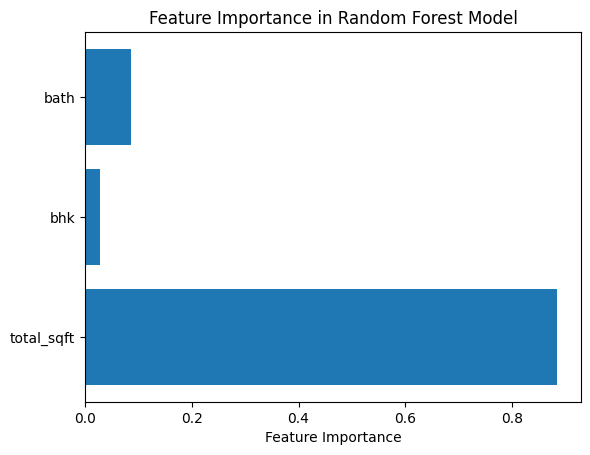

In [16]:
# horizontal bar plot showing which features influence price prediction most

feature_importances = loaded_model.feature_importances_
features = ['total_sqft', 'bhk', 'bath']  # your features list

plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()